In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from math import sqrt
%matplotlib inline
np.set_printoptions(precision=3)
fig_width = 6.9
golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

params = {
   'axes.labelsize': 8,
   'text.latex.preamble': ['\\usepackage{gensymb}'],
   'font.size': 10,
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
   'legend.fontsize': 8,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': True,
   'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif'
   }
rcParams.update(params)


# Introducing Scikit-Learn



## Data Representation in Scikit-Learn

The best way to think about data within Scikit-Learn is in terms of tables of data. Consider the Cities data set below.

In [4]:
data = pd.read_csv('Data/Cities.csv')
data.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


Here each row of the data refers to a single observed city, and the number of rows is the total number of city in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as $n_{samples}$.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as $n_{features}$.

### Features matrix

A two-dimensional numerical array or matrix with shape [$n_{samples}$, $n_{features}$]. By convention, this features matrix is often stored in a variable named $X$.

The samples (i.e., rows) always refer to the individual objects described by the dataset

The features (i.e., columns) always refer to the distinct observations that describe each sample.

### Target array

One dimensional, with length $n_{samples}$ usually the quantity we want to predict from the data

## Scikit-Learn's Estimator API

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

The steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the **fit()** method of the model instance.
5. Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the **predict()** method.
  * For unsupervised learning, we often transform or infer properties of the data using the **transform()** or **predict()** method.
  
Let us apply this step in the following example  


### Supervised learning: Simple linear regression

In regression, we are interested in predicting a scalar-valued target, such as the price of a stock. By linear, we mean that the target must be predicted as a linear function of the inputs.

We will use the Cities dataset and our target is to predict city temperature given its latitude.

### 1. Let Choose a class of model

Import  the linear regression class:

In [5]:
from sklearn.linear_model import LinearRegression

**Note** more general linear regression models exist as well follow this [link](http://scikit-learn.org/stable/modules/linear_model.html)

### 2. Choose model hyperparameters

This step involve defining the model with its associated parameters

In [6]:
model = LinearRegression()

### 3. Arrange data into a features matrix and target vector

Here our target variable y is already tempearture and the feature matrix is latitude.

In [7]:
y = data.temperature

In [8]:
# check the shape of target
y.shape

(213,)

Our target variable y is already in the correct form: a 1-dimensional array

In [9]:
# feature matrix
X = data.latitude

In [10]:
# check shape of X
X.shape

(213,)

We therefore need to massage the data X to make it a matrix of size [n_samples, n_features]

In [13]:
#  convert the 1-dimensional X  array into an X array with 2 axes
X = X[:, np.newaxis]
X.shape

(213, 1)

### 4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [15]:
# fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-0.436]
y-axis intercept:  30.2087038343


### 5 Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data.

For the sake of this example, our "new data" will be a grid of X values, and we will ask what y values the model predicts:

Let select the last ten city and use our model to predict their temperature.

In [33]:
xval = data.tail(10).latitude
xval.shape

(10,)

As before, we need to coerce these X values into a [n_samples, n_features] features matrix.

In [34]:
xval = xval[:, np.newaxis]
xval

array([[ 48.2 ],
       [ 42.22],
       [ 54.68],
       [ 52.25],
       [ 51.11],
       [ 45.2 ],
       [ 41.65],
       [ 50.25],
       [ 41.43],
       [ 47.38]])

In [35]:
y_pred = model.predict(xval)

Let visulaize the actual values vs predicted values

In [28]:
y_actual = data.tail(10).temperature

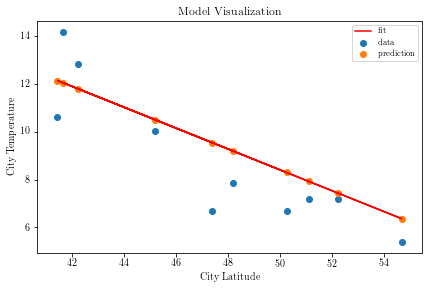

In [47]:
plot_name = "ML_regression"
plt.scatter(xval, y_actual, label="data")
plt.scatter(xval, y_pred, label="prediction")
plt.plot(xval,y_pred, c='red',label='fit')
plt.legend(loc='best')
plt.title('Model Visualization')
plt.xlabel('City Latitude')
plt.ylabel('City Temperature')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

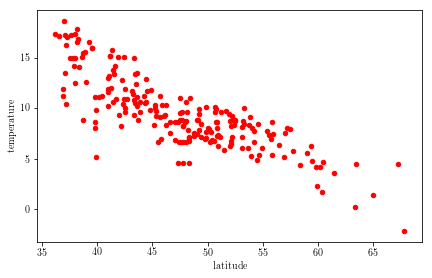

In [3]:
# Plot latitude versus temperature scatterplot
data.plot.scatter(x='latitude', y='temperature',c='r',s=20)

## Task Given latitude predict the temperature

In [64]:
# prepare data
x = data[['latitude','city']]
y = data[['temperature','city']]
print(x.shape)
print(y.shape)

(213, 2)
(213, 2)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

The dataset includes 213 instances. Our first step will be to separate the dataset into to separate sets, using 75% of the instances for training our classifier, and the remaining 25% for evaluating it

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [67]:
X_train=x_train.iloc[:,0] 
X_test=x_train.iloc[:,0] 
Y_train=y_train.iloc[:,0] 
Y_test=y_train.iloc[:,0] 

Note that the scikit-learn API requires us to provide the target variable (y) as a 1-dimensional array; scikit-learn's API expects the samples (X) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional x NumPy array into an X array with 2 axes:

In [68]:
X_train.shape

(159,)

In [69]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

To implement linear classification, we will use the linear model from scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

In [71]:
# define the model
model = LinearRegression()

In [72]:
# fit the model
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-0.437]
y-axis intercept:  30.3776725221


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as:
$$ y = mx + c$$


Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

In [75]:
min_x= x.iloc[:,0].min()
max_x = x.iloc[:,0].max()
min_pt = min_x* model.coef_[0] + model.intercept_
max_pt = max_x * model.coef_[0] + model.intercept_


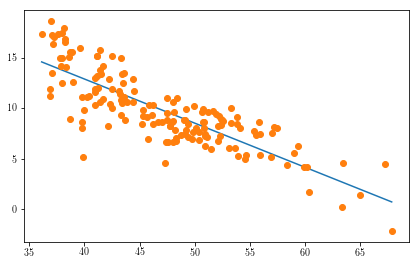

In [76]:
plt.plot([min_x,max_x], [min_pt, max_pt])
plt.plot(X_train, Y_train, 'o');


In [81]:
y_pred_train = model.predict(X_train)

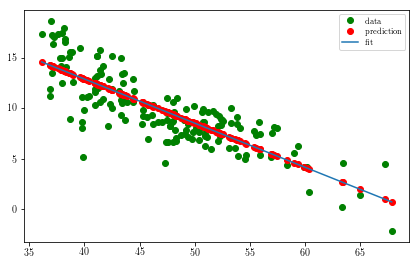

In [83]:
plt.plot(X_train, Y_train, 'go', label="data")
plt.plot(X_train, y_pred_train, 'ro', label="prediction")
plt.plot([min_x, max_x], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details. Next, let's try the test set:

In [84]:
y_pred_test = model.predict(X_test)

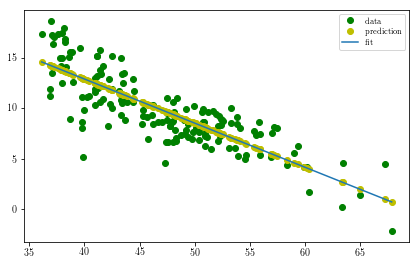

In [85]:
plt.plot(X_test, Y_test, 'go', label="data")
plt.plot(X_test, y_pred_test, 'yo', label="prediction")
plt.plot([min_x, max_x], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

In [135]:
def linear_model(name):
    city = data[data.city == name]
    if len(city) !=0:
        lat = city.latitude
        real_t = np.array(city.temperature)
        #real_t = real_t[:, np.newaxis]
        lat=lat[:, np.newaxis]
        pred_t=model.predict(lat)
        print ('Actual temperature:','Predicted temperature')
        print(real_t," : ", pred_t)
        #print ('Predicted temperature:', pred_t)
        #print ('Actual temperature:', real_t)
        return real_t, pred_t, acc
    else:
        print ('City not in dataset')
    

In [136]:
name = data[data.country=='Turkey']['city']
name.values
for i in name.values:
    linear_model(i)


Actual temperature: Predicted temperature
[ 18.67]  :  [ 14.21]


NameError: name 'acc' is not defined

# <font color="red">Exercise: World Cup Data</font>

1. From the players data, compute and plot a linear regression for minutes played (x-axis) versus passes made (y-axis).
2. Use linear regression for interactive number-of-passes predictor Training data: compute minutes-passes regression for players from  Greece, USA, and Portugal

## Classifier

In [3]:
data = pd.read_csv('Data/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# plotting a scatter matrix
from matplotlib import cm
X = data[['Sex', 'Age', 'Cabin', 'Embarked']]
y = data['Survived']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

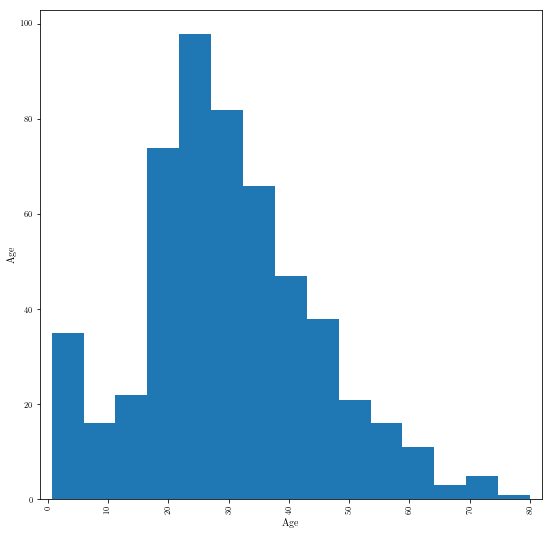

In [8]:
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))